In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

import torch.optim as optim 
from torch.utils.data import DataLoader 
import torchvision.datasets as datasets 
import torchvision.transforms as transforms 

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [4]:
# Set up for getting reproducibility of result
random.seed(1)
np.random.seed(1)
torch.manual_seed(1)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [5]:
# Hyperparameters
input_size = 784
n_classes = 10
learning_rate = 0.001
batch_size = 64
n_epochs = 50

In [9]:
# Load 'MNIST' dataset
train_dataset = datasets.FashionMNIST(root='/content/drive/MyDrive/Datasets/FashionMNIST', train=True, 
                                                                 transform=transforms.ToTensor(), download=False)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = datasets.FashionMNIST(root='/content/drive/MyDrive/Datasets/FashionMNIST', train=False, 
                                                               transform=transforms.ToTensor(), download=False)

test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

In [10]:
train_dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /content/drive/MyDrive/Datasets/FashionMNIST
    Split: Train
    StandardTransform
Transform: ToTensor()

In [11]:
test_dataset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: /content/drive/MyDrive/Datasets/FashionMNIST
    Split: Test
    StandardTransform
Transform: ToTensor()

In [15]:
classes = ['T-shirt', 'Trouser','Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

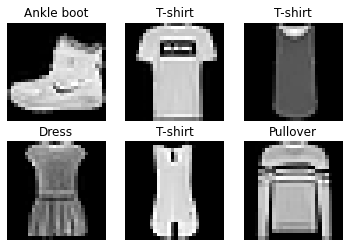

In [19]:
for i in range(6):
    image, label = train_dataset[i]
    plt.subplot(2,3,i+1)
    plt.title(classes[label])
    plt.axis('off')
    plt.imshow(image.squeeze(), cmap='gray')

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_size, n_classes):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(in_features=input_size, out_features=100),
            nn.ReLU(),
            nn.Linear(in_features=100, out_features=100),
            nn.ReLU(),
            nn.Linear(in_features=100, out_features=50),
            nn.ReLU(),
            nn.Linear(in_features=50, out_features=25),
            nn.ReLU(),
            nn.Linear(in_features=25, out_features=n_classes),
            nn.Softmax(dim=1)
        )

    def forward(self, X):
        prob = self.model(X)
        return prob


In [ ]:
model = MLP(input_size=input_size, n_classes=n_classes).to(device)
model

MLP(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU()
    (6): Linear(in_features=50, out_features=25, bias=True)
    (7): ReLU()
    (8): Linear(in_features=25, out_features=10, bias=True)
    (9): Softmax(dim=1)
  )
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
for epoch in range(n_epochs):
    for batch_idx, (images, labels) in enumerate(train_loader):
        # Get data to GPU
        images = images.to(device)
        labels = labels.to(device)

        # Reshape
        images = images.reshape(images.shape[0], -1)

        # Forward pass
        z_scores = model(images)
        loss = criterion(z_scores, labels)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()

        # Gradient descent
        optimizer.step()

        if(batch_idx + 1) % 100 == 0:
            print(f'Epoch {epoch+1}/{n_epochs}, Batch {batch_idx+1}, Loss: {loss.item():.4f}')

In [ ]:
def get_accuracy(loader, model):
    if loader.dataset.train:
        print('Getting accuracy on trainning data')
    else:
        print('Getting accuracy on testing data')

    n_corrects = 0
    n_samples = 0

    # Put model to evalution mode
    model.eval()

    with torch.no_grad():
        for images, labels in loader:
        images = images.to(device)
        labels = labels.to(device)

        images = images.reshape(images.shape[0], -1)

        z_scores = model(images)

        _, y_pred = z_scores.max(1)
        n_corrects += (y_pred == labels).sum()
        n_samples += y_pred.size(0)

    print(f'We got {n_corrects}/{n_samples} correct')
    print(f'Accuracy =  {float(n_corrects) / float(n_samples)*100.0:.2f}')
    # Put model to train mode
    model.train()

In [ ]:
get_accuracy(train_loader, model)
get_accuracy(test_loader, model)

Getting accuracy on trainning data
We got 52798/60000 correct
Accuracy =  88.00
Getting accuracy on testing data
We got 8586/10000 correct
Accuracy =  85.86
